# **Hate Speech Detection using YouTube Comments**

***Importing the DataSet***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('youtoxic_english_1000.csv')
df2 = pd.read_csv("HateSpeechDatasetBalanced.csv")


In [ ]:
df1 = df1[["Text", "IsHatespeech"]]
df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)
df1.head(2)

<ipython-input-3-b8a2874d4bc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["IsHatespeech"] = df1["IsHatespeech"].astype(int)


,Text,IsHatespeech
0,If only people would just take a step back and...,0
1,Law enforcement is not trained to shoot to app...,0


In [ ]:
df2 = df2.rename(columns={'Content':"Text","Label":"IsHatespeech"})

In [ ]:
combined_df = pd.concat([df2, df1])

combined_df = combined_df.reset_index(drop=True)

combined_df.tail()

,Text,IsHatespeech
105323,I remember that they sent in the national defe...,0.0
105324,Stats don`t represent the problem. Race baitin...,1.0
105325,The quote from the mother... Wow that hit hard...,0.0
105326,this video is so racist,0.0
105327,"God, the narrator has such an annoying lisp.",0.0


In [ ]:
combined_df.groupby("IsHatespeech").count()

,Text
IsHatespeech,
0.0,68445
1.0,36882


In [ ]:
combined_df.to_csv("Final_Dataset.csv")

In [ ]:
df =  pd.read_csv("Final_Dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,Text,IsHatespeech
0,0,denial of normal the con be asked to comment o...,1.0
1,1,just by being able to tweet this insufferable ...,1.0
2,2,that is retarded you too cute to be single tha...,1.0
3,3,thought of a real badass mongol style declarat...,1.0
4,4,afro american basho,1.0


# **Data Cleaning And EDA**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates
df = df.drop_duplicates()

Unnamed: 0      0
Text            0
IsHatespeech    1
dtype: int64


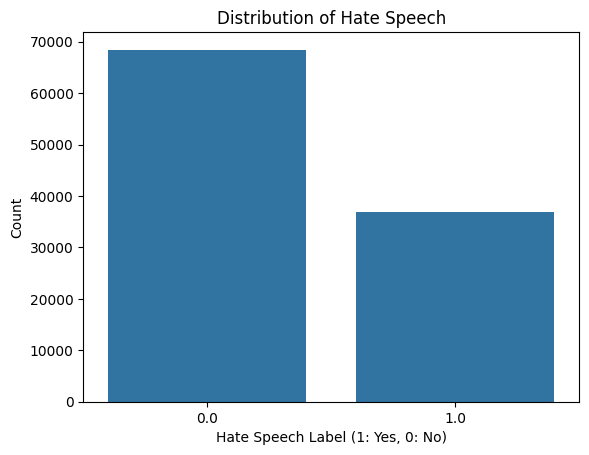

In [ ]:
# Visualize distribution of hate speech
sns.countplot(x='IsHatespeech', data=df)
plt.title("Distribution of Hate Speech")
plt.xlabel("Hate Speech Label (1: Yes, 0: No)")
plt.ylabel("Count")
plt.show()

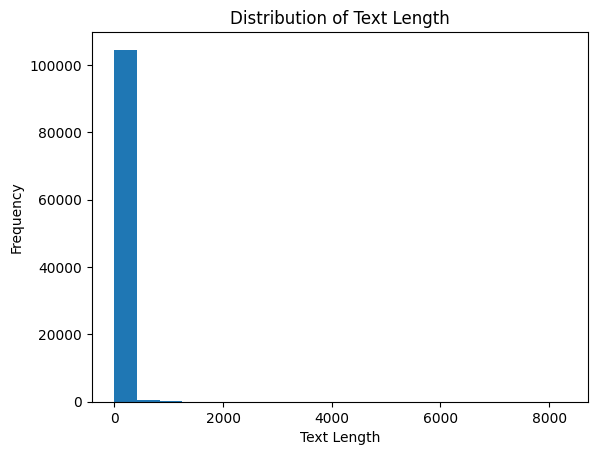

In [ ]:
# Analyze comment length
df['Text_length'] = df['Text'].apply(len)
plt.hist(df['Text_length'], bins=20)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105328 entries, 0 to 105327
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    105328 non-null  int64  
 1   Text          105328 non-null  object 
 2   IsHatespeech  105327 non-null  float64
 3   Text_length   105328 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ MB


In [ ]:
df.describe()

,Unnamed: 0,IsHatespeech,Text_length
count,105328.000000,105327.000000,105328.000000
mean,52663.500000,0.350167,98.343451
std,30405.718914,0.477024,90.025508
min,0.000000,0.000000,1.000000
25%,26331.750000,0.000000,45.000000
50%,52663.500000,0.000000,76.000000
75%,78995.250000,1.000000,124.000000
max,105327.000000,1.000000,8299.000000


# ***Finalized Tokenization and Embedding Technique***
**TF IDF**

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df = pd.read_csv('Preprocessed_cleaned_Final_dataset.csv')
# 1. Tokenize Text (using NLTK)
nltk.download('punkt')


df['clean_text'] = df['clean_text'].astype(str)

df['tokens'] = df['clean_text'].apply(nltk.word_tokenize)

# 2. Join Tokens Back to Strings (required for TfidfVectorizer)
df['tokenized_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

# 3. Create TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# 4. Fit and Transform Text Data
tfidf_vectors = vectorizer.fit_transform(df['tokenized_text'])

# 5. Access TF-IDF Vectors
print(tfidf_vectors.shape)
print(tfidf_vectors[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(9310, 18883)
  (0, 16371)	0.21327532028385762
  (0, 8375)	0.22331939844770585
  (0, 15539)	0.16507193004845175
  (0, 13055)	0.25353772782811773
  (0, 17669)	0.2758041704864419
  (0, 15164)	0.23096093743329466
  (0, 6888)	0.2973463928228995
  (0, 17721)	0.1670692581532512
  (0, 503)	0.2256974053491357
  (0, 18302)	0.13845710005550127
  (0, 18369)	0.2808037224646007
  (0, 12466)	0.3384795610845744
  (0, 9455)	0.20099341532106854
  (0, 8076)	0.1967956289534735
  (0, 6220)	0.172883582651531
  (0, 12521)	0.13716590233482323
  (0, 15341)	0.2256974053491357
  (0, 6610)	0.35366058963129743


# **Hyper Tunning ML Models**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Preprocessed_cleaned_Final_dataset.csv")
df['clean_text'] = df['clean_text'].fillna('')

In [ ]:
# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Define models and their hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10], 'criterion': ['gini', 'entropy']})
}


In [ ]:
# Perform hyperparameter tuning for each model
for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")

Tuning Logistic Regression...
Tuning Random Forest...
Tuning SVM...
Tuning Decision Tree...


In [ ]:

    random_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_iter=5)
    random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

In [ ]:
 # Print best parameters and score
print(f"Best parameters for {model_name}: {random_search.best_params_}")
print(f"Best accuracy for {model_name}: {random_search.best_score_}")

Best parameters for Random Forest: {'n_estimators': 50, 'max_depth': None}
Best accuracy for Random Forest: 0.7451672894289668


# **Finalized ML Model**

# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7943071965628357
Precision: 0.7744209466263847
Recall: 0.8286637931034483
F1-score: 0.8006246746486206
